<a href="https://colab.research.google.com/github/preethir-18/Complex-Network-Analysis/blob/main/Correlation_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install mne
!pip install mat73
!pip install mne_connectivity
!pip install networkx

In [ ]:
import numpy as np
import mne
from scipy.io import loadmat
import mat73
from matplotlib import pyplot as plt 
from mne_connectivity import spectral_connectivity_epochs
import networkx as nx
import pandas as pd

In [ ]:
mne.set_log_level('error')

In [ ]:
data = mat73.loadmat(r"/content/drive/MyDrive/music_listening_experiment_s01.mat", only_include = None)
#data

In [ ]:
data.keys()

dict_keys(['EEG_Rest', 'EEG_Songs', 'Fs', 'sensor_info', 'song_ratings'])

In [ ]:
song_ratings = data['song_ratings']
len(song_ratings)

30

In [ ]:
c=0
k=0
for i in range(30):
  if song_ratings[i] == 1:
    c=c+1
  if song_ratings[i] == 1:
    k=k+1 
        
print(c,k)

10 10


In [ ]:
song_ratings[9]

1.0

In [ ]:
chname = (data['sensor_info'])['labels']
print(chname)
eeg_rest = data['EEG_Rest']
#print(eeg_rest)
eeg_songs = data['EEG_Songs']
#print(eeg_songs)
s_freq = data['Fs']
print(s_freq)
eeg_songs.shape

[['af3'], [' f7'], [' f3'], ['fc5'], [' t7'], [' p7'], [' o1'], [' o2'], [' p8'], [' t8'], ['fc6'], [' f4'], [' f8'], ['af4']]
128.0


(30, 14, 10240)

In [ ]:
channel=['AF3','F7','F3','FC5','T7','P7','O1','O2','P8','T8','FC6','F4','F8','AF4']
ch_name = np.array(channel)

(14, 10240)


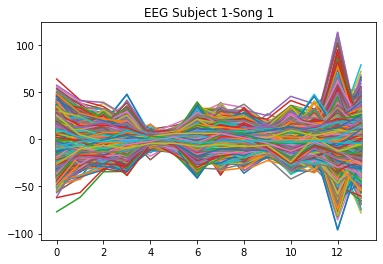

In [ ]:
eeg_song1 = eeg_songs[0]
print(eeg_song1.shape)
plt.title("EEG Subject 1-Song 1")
plt.plot(eeg_song1)
plt.savefig('EEG plot song1.png')

In [ ]:
epoch=np.empty((80,14,128))
#print(epoch)
epoch.shape

(80, 14, 128)

In [ ]:
a=0
b=128
for i in range(80):
  for j in range(14):
    channels = eeg_song1[j]
    seg = np.array(channels[a:b])
    for k in range(128):
      epoch[i,j,k] = seg[k]
  a=b
  b=a+128
#print(epoch)
epoch.shape

(80, 14, 128)

In [ ]:
fmin = 30.0
fmax = 45.0

In [ ]:
matrix = spectral_connectivity_epochs(epoch, names=ch_name, method='wpli', indices=None, sfreq=s_freq,fmin=fmin,fmax=fmax,faverage=True)
matrix.shape

(196, 1)

In [ ]:
type(matrix)

mne_connectivity.base.SpectralConnectivity

In [ ]:
conmat = matrix.get_data(output='dense')[:, :, 0]
conmat.shape 

(14, 14)

In [ ]:
from statistics import mean
import networkx.algorithms.community as nx_comm
from networkx.algorithms.community import greedy_modularity_communities

In [ ]:
G = nx.from_numpy_matrix(conmat)
label_mapping = dict(zip(G.nodes(),ch_name))
H = nx.relabel_nodes(G, label_mapping)
#nx.draw(H,with_labels=True)
feature_matrix=[]
communities = sorted(nx_comm.greedy_modularity_communities(H,weight='weight'), key=len, reverse=True)
feature_matrix.append(len(communities))
# modularity
feature_matrix.append(nx_comm.modularity(H,communities,weight='weight'))

In [ ]:
feature_matrix

[2, 0.028626365780970928]

In [ ]:
x=[1,2,3,4,5,6]
print(mean(x))

3.5


In [ ]:
print(nx.average_shortest_path_length(H))

print(nx.is_connected(G))

1.0
True


In [ ]:
G = nx.from_numpy_matrix(conmat)
label_mapping = dict(zip(G.nodes(),ch_name))
H = nx.relabel_nodes(G, label_mapping)
H.nodes()

NodeView(('AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4'))

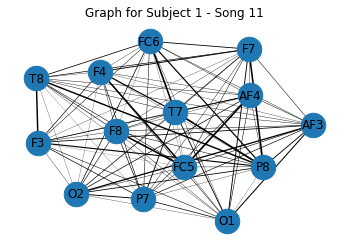

In [ ]:
G = nx.from_numpy_matrix(conmat)
label_mapping = dict(zip(G.nodes(),ch_name))
H = nx.relabel_nodes(G, label_mapping)

all_weights = []
#4 a. Iterate through the graph nodes to gather all the weights
for (node1,node2,data) in G.edges(data=True):
    all_weights.append(data['weight']) #we'll use this when determining edge thickness

#4 b. Get unique weights
unique_weights = list(set(all_weights))

node_list = G.nodes()
widths=[]
#4 c. Plot the edges - one by one!
for weight in unique_weights:
    #4 d. Form a filtered list with just the weight you want to draw
    weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in G.edges(data=True) if edge_attr['weight']==weight]
    #4 e. I think multiplying by [num_nodes/sum(all_weights)] makes the graphs edges look cleaner
    #print(all_weights)
    width = weight*len(node_list)*(4.0/np.sum(all_weights))
    widths.append(width)
nx.draw_networkx(H, pos = nx.spring_layout(H), label=True, width=widths, node_size=600)
    
 
 #Plot the graph
plt.axis('off')
plt.title('Graph for Subject 1 - Song 11')
plt.savefig("Graph-Song11-0.3.png") 
plt.show()

In [ ]:
print(np.sum(all_weights))

18.033274536902667








Circular connectivity plot

In [ ]:
from mne.viz import circular_layout
from mne_connectivity.viz import plot_connectivity_circle

In [ ]:
node_colors={'red','blue','green','yellow','white','gray','orange','purple','brown','pink','olive','cyan','indigo','turquoise'}

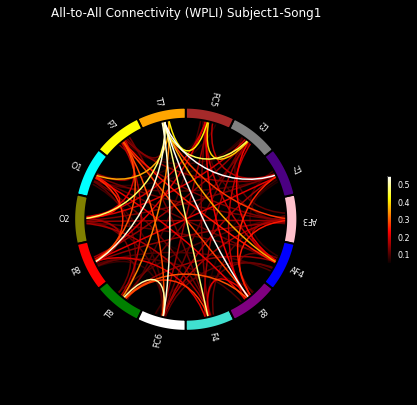

<Figure size 432x288 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8), facecolor='black',
                       subplot_kw=dict(polar=True))
plot_connectivity_circle(conmat, channel, n_lines=300, node_angles=None, node_colors=node_colors, 
                         title='All-to-All Connectivity (WPLI) Subject1-Song1', ax=ax)
fig.tight_layout()
plt.savefig('CirPlot Song1.png')

DATA TO EXCEL

In [ ]:
conmat_excel = pd.DataFrame(conmat)
conmat_excel.to_excel(excel_writer = "D:\Sem 1\Computation and Cognition\Project\Computation Project Data.xlsx", sheet_name='Adajacency Matrix')

In [ ]:
with pd.ExcelWriter(r"D:\Sem 1\Computation and Cognition\Project\Computation Project Data.xlsx") as writer:
  conmat_excel = pd.DataFrame(conmat)
  conmat_excel.to_excel(writer, sheet_name='Adajacency Matrix')

THRESHOLDED MATRICES

In [ ]:
threshold = [0.2, 0.3, 0.4, 0.5]
thresh_mat = dict()
conmat_new = np.empty((14,14))
for value in threshold:
  for i in range(14):
    for j in range(14):
      if(conmat[i, j] >= value):
        conmat_new[i, j] = conmat[i, j]
      else:
        conmat_new[i, j] = 0.0
  thresh_mat[value] = conmat_new
  conmat_new = np.empty((14,14))

In [ ]:
thresh_mat

{0.2: array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.38669344, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        ],
        [0.27236826, 0.5506883 , 0.46237919, 0.41076234, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        ],
        [0.    

GRAPH MEASURES

In [ ]:
avg_degree = []

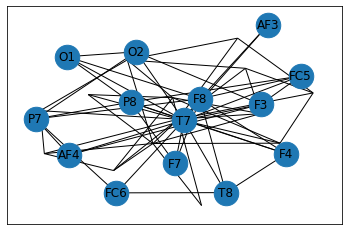

<Figure size 432x288 with 0 Axes>

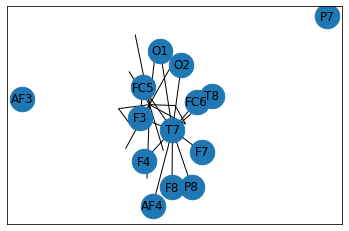

<Figure size 432x288 with 0 Axes>

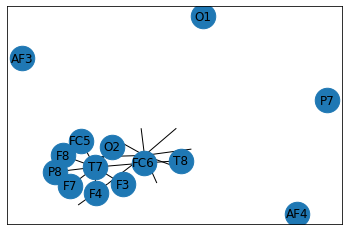

<Figure size 432x288 with 0 Axes>

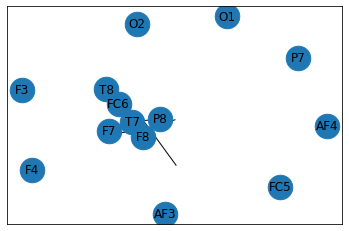

<Figure size 432x288 with 0 Axes>

In [ ]:
for value in threshold:
  G = nx.from_numpy_matrix(thresh_mat[value])
  label_mapping = dict(zip(G.nodes(),ch_name))
  H = nx.relabel_nodes(G, label_mapping)
  all_weights=[]
  for (node1,node2,data) in H.edges(data=True):
       all_weights.append(data['weight'])
  unique_weights = list(set(all_weights))
  widths=[]
  all_weights=[]
  for (node1,node2,data) in H.edges(data=True):
      all_weights.append(data['weight'])
  unique_weights = list(set(all_weights))
  widths=[]
  for weight in unique_weights:
        #4 d. Form a filtered list with just the weight you want to draw
        weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in G.edges(data=True) if edge_attr['weight']==weight]
        #4 e. I think multiplying by [num_nodes/sum(all_weights)] makes the graphs edges look cleaner
        width = weight*len(G.nodes())*3.0/np.sum(all_weights)
  nx.draw_networkx_edges(H, pos=nx.spring_layout(H), label=True, width=widths, node_size=600)
  nx.draw_networkx(H, pos=nx.spring_layout(H), with_labels=True, width=widths, node_size=600)

  H.clear()
  G.clear()
  plt.draw() 
  plt.figure() # To plot the next graph in a new figure
  plt.show()


In [ ]:
avg_clustering = []
dg_centrality = dict()

In [ ]:
dg_centrality

{}

In [ ]:
nx.average_degree_connectivity(H)

{}

In [ ]:
H.edges

EdgeView([])

In [ ]:
nx.degree_centrality(H)

{}

In [ ]:
nx.closeness_centrality(H)

{}

In [ ]:
nx.betweenness_centrality_source(H)

{}

In [ ]:
spl=nx.shortest_path_length(H, source="AF4", target="F8")
print(spl)


NodeNotFound: ignored

In [ ]:
np_array = np.array(avg_degree)


In [ ]:
a = [[2.2, 3.2,4.2],[3,4,4]]

In [ ]:
for thres in treshold:
  all_np = []

  for iterating graphs
    network_properties =[]
    network_properties.append(avg_degree)
    network_properties.append(clustering_coeff)

  all_np.append(network_properties)

  pd.DataFrame(np.array(all_np),header=[])

In [ ]:
arr =np.array(a).shape

In [ ]:
import pandas as pd

In [ ]:
df1 = pd.DataFrame([['a', 'b'], ['c', 'd']],
                   index=['row 1', 'row 2'],
                   columns=['col 1', 'col 2'])
df1.to_excel("output.xlsx")

In [ ]:
# convert array into dataframe
DF = pd.DataFrame(arr,header=[])
 
# save the dataframe as a csv file
DF.to_csv("data1.csv")

In [ ]:
DF. append